**PBL Causal Impact**

Objetivo: Com o surgimento do Blog, houve mudança significativa na receita?

--
*Lais Hellen*

# Tratamento dos Dados

In [ ]:
#Instalação da biblioteca Causal Impact

pip install tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 7.5 MB/s 
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.16.0
    Uninstalling tensorflow-probability-0.16.0:
      Successfully uninstalled tensorflow-probability-0.16.0


In [ ]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
from causalimpact import CausalImpact
import seaborn as sns

In [ ]:
#Leitura dos dados
dados = pd.read_csv('dados.csv', sep=',', index_col=['data'])
dados.head()

receita  transacoes_blog  transacoes_site  usuarios_blog  \
data                                                                   
2019-01-01   349184                0             4693              0   
2019-01-02   867328                0             8501              0   
2019-01-03   758590                0             9375              0   
2019-01-04   688873                0             8405              0   
2019-01-05   441760                0             6136              0   

            usuarios_site  
data                       
2019-01-01          46739  
2019-01-02          83129  
2019-01-03          86067  
2019-01-04          69363  
2019-01-05          56183

In [ ]:
#Separando os dados de interesse
dados = pd.DataFrame(dados, columns = ['receita', 'transacoes_blog', 'transacoes_site'])

dados.head()

receita  transacoes_blog  transacoes_site
data                                                 
2019-01-01   349184                0             4693
2019-01-02   867328                0             8501
2019-01-03   758590                0             9375
2019-01-04   688873                0             8405
2019-01-05   441760                0             6136

In [ ]:
#Tratamento dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 2019-01-01 to 2020-09-30
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   receita          639 non-null    int64
 1   transacoes_blog  639 non-null    int64
 2   transacoes_site  639 non-null    int64
dtypes: int64(3)
memory usage: 20.0+ KB


In [ ]:
#conferência de existência de dados nulos
print('Quantidade de dados nulos:', dados.isna().sum().sum())

Quantidade de dados nulos: 0


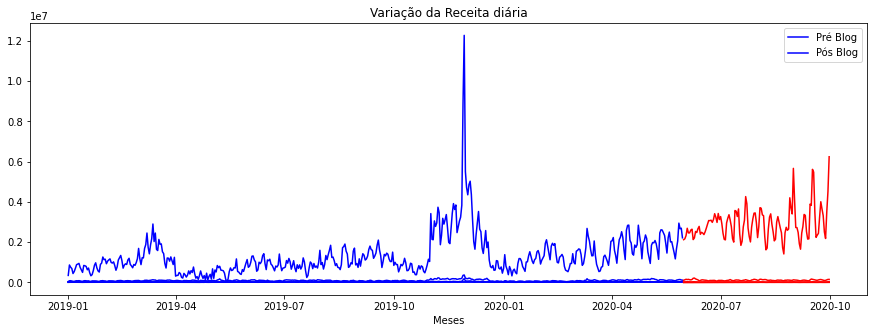

In [ ]:
# Data de corte
data_corte = '2020-05-31'

# Separando em pré e pós Blog, pela data e colocando a data como índice
pre_blog = dados[dados.data<data_corte].set_index('data')
pos_blog = dados[dados.data>=data_corte].set_index('data')

# Plotando
plt.figure(figsize=(15,5))
plt.plot(pre_blog,color='b') # Plotando pré blog
plt.plot(pos_blog,color='r') # Plotando pós blog
plt.legend(['Pré Blog','Pós Blog'])
plt.xlabel('Data')
plt.xlabel('Meses')
plt.title('Variação da Receita diária')
plt.show()

# Causal Impact

In [ ]:
#Intervalo de datas antes e depois da chegada do blog
pre_blog = ["2019-01-01", "2020-05-31"] 
pos_blog = ["2020-06-01", "2020-09-30"] 

#soma das transações que impactam na receita total
dados['transacoes_total'] = dados['transacoes_site'] + dados['transacoes_blog'] 

dados2 = dados[['receita', 'transacoes_total']]

#checando a tabela dados 2
dados2.head()

receita  transacoes_total
data                                 
2019-01-01   349184              4693
2019-01-02   867328              8501
2019-01-03   758590              9375
2019-01-04   688873              8405
2019-01-05   441760              6136

In [ ]:
impacto = CausalImpact(dados2, ["2019-01-01", "2020-05-31"], ["2020-06-01", "2020-09-30"]) # colocar depois, model_args={'fit_method': 'hmc'})

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`


Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`


Instructions for updating:
Do not call `graph_parents`.


Instructions for updating:
Do not call `graph_parents`.


Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


In [ ]:
print(impacto.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    2921583.5          356433184.0
Prediction (s.d.)         2016252.88 (276258.39)245982848.0 (33703526.96)
95% CI                    [1494480.58, 2577393.73][182326624.8, 314442042.4]

Absolute effect (s.d.)    905330.62 (276258.39)110450336.0 (33703526.96)
95% CI                    [344189.77, 1427102.92][41991141.6, 174106559.2]

Relative effect (s.d.)    44.9% (13.7%)      44.9% (13.7%)
95% CI                    [17.07%, 70.78%]   [17.07%, 70.78%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(impacto.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 2921583.5. By contrast, in the absence of an
intervention, we would have expected an average response of 2016252.88.
The 95% interval of this counterfactual prediction is [1494480.58, 2577393.73].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 905330.62 with a 95% interval of
[344189.77, 1427102.92]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 356433184.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 245982848.0. The 95% interval of this prediction is [182326624.8, 314442042.4].


The above results are given in terms of abso

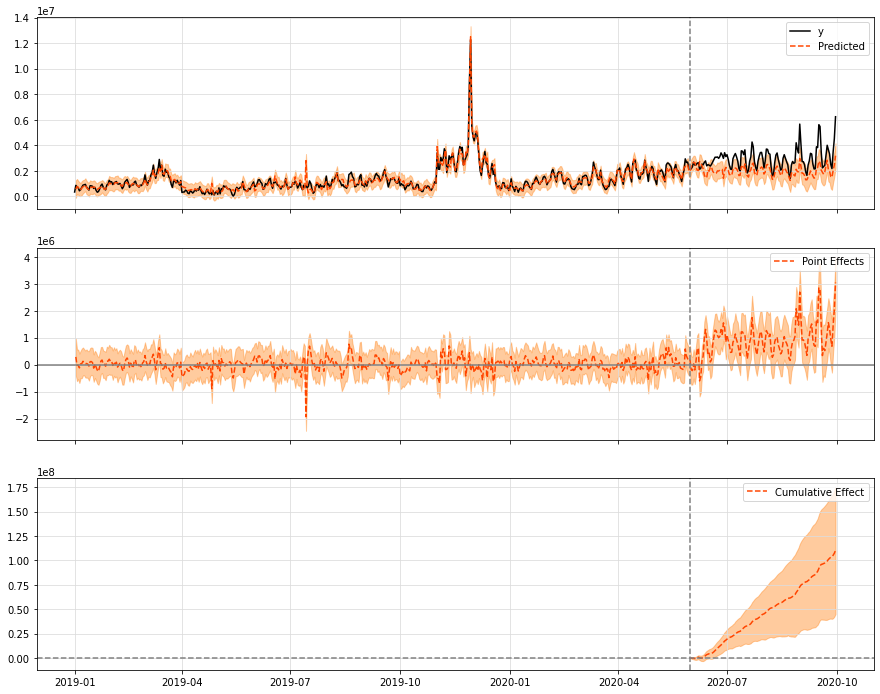

In [21]:
impacto.plot(figsize=(15, 12))

In [24]:
#Visualização das estatísticas descritivas
dados.describe().round()

receita  transacoes_blog  transacoes_site  transacoes_total
count       639.0            639.0            639.0             639.0
mean    1623891.0            528.0          19039.0           19567.0
std     1160581.0           1202.0          13678.0           13813.0
min       32085.0              0.0           3557.0            3557.0
25%      807342.0              0.0          11013.0           11042.0
50%     1263161.0              0.0          16069.0           16392.0
75%     2232770.0              0.0          22606.0           24410.0
max    12266844.0           5586.0         188955.0          188955.0

# Observações e conclusões sobre o Resultado

- No mês de novembro de 2019, onde geralmente se tem Black Friday, é o mês de maior receita geral entre o período avaliado, e apesar de uma queda com relação à novembro, 2020, ano de inicio da pandemia, mostra uma receita crescente em comparação ao ano anterior, incluindo os meses onde o blog da empresa estava no ar;

- Todo ajuste para aplicação do modelo é feito dividindo os dados em dois períodos: antes do blog e depois do blog. A sombra laranja do gráfico da análise de Impacto causal nos revela que o modelo está bem ajustado, com o intervalo de confiança de 95%. 

- O 2º gráfico da área de impacto causal mostra a diferença da situação real com a observada e é notável que a maior variação positiva é após a linha tracejada cinza, ou seja, depois do funcionamento do blog.

- Conforme o próprio resumo fornecido pela função da biblioteca Causal Impact, a média da receita sem intervenção é menor comparada a média pós surgimento do blog, além de que, de acordo com o gráfico de efeito acumulativo (3° gráfico), onde se tem um acumulado das contruibuições pontuais das transações do blog sob a receita, pode-se afirmar que esse novo canal de comunicação teve impacto positivo sobre as vendas totais.